In [47]:
## 2.Analiza eksploracyjna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pp
from scipy.stats import normaltest
pd.set_option('display.max_columns', None)


In [48]:

df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.00,0,11.04,0,0,"1,434.00",5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0,0.19


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [50]:
# w danych występują 3 kolumny o charakterze id, oraz jedna kolumna kategoryczna identyfikująca typ meczu
# pozostałe dane są numeryczne o całkowitych lub zmiennoprzecinkowych wartościach

In [51]:
# czy są brakujące wartości?
df.isnull().values.any()

True

In [52]:
# gdzie są?
ind = np.where(df.isnull())
np.array(df)[ind[0]]

array([['f70c74418bb064', '12dfbede33f92b', '224a123c53e008', 0, 0, 0.0,
        0, 0, 0, 1, 0, 0, 0, 0.0, 9, 'solo-fpp', 1, 1, 1574, 0, 0.0, 0,
        0.0, 0, 0, 0.0, 0, 0, nan]], dtype=object)

In [53]:
# brak zmiennej wyjściowej, usuń te rekordy
df = df.dropna()
df.isnull().values.any()

False

In [54]:
pd.options.display.float_format = '{:,.2f}'.format # wyłącza notację naukową
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,"4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00","4,446,965.00"
mean,0.23,1.11,130.72,0.66,0.23,1.37,47.60,505.01,0.92,0.54,23.00,"1,579.51",44.50,43.01,892.01,0.16,606.12,0.00,4.51,0.02,0.01,"1,154.22",3.66,606.46,0.47
std,0.59,1.72,170.78,1.15,0.60,2.68,27.46,627.50,1.56,0.71,50.97,258.74,23.83,23.29,736.65,0.47,"1,498.34",0.07,30.50,0.17,0.09,"1,183.50",2.46,739.70,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,133.00,2.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,0.00,"1,367.00",28.00,27.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,155.10,2.00,0.00,0.20
50%,0.00,0.00,84.24,0.00,0.00,0.00,47.00,0.00,0.00,0.00,0.00,"1,438.00",30.00,30.00,"1,443.00",0.00,0.00,0.00,0.00,0.00,0.00,685.60,3.00,0.00,0.46
75%,0.00,2.00,186.00,1.00,0.00,2.00,71.00,"1,172.00",1.00,1.00,21.32,"1,851.00",49.00,47.00,"1,500.00",0.00,0.19,0.00,0.00,0.00,0.00,"1,976.00",5.00,"1,495.00",0.74
max,22.00,33.00,"6,616.00",53.00,64.00,80.00,101.00,"2,170.00",72.00,20.00,"1,094.00","2,237.00",100.00,100.00,"5,910.00",39.00,"40,710.00",18.00,"3,823.00",12.00,5.00,"25,780.00",236.00,"2,013.00",1.00


In [55]:
## Pierwsze spojrzenie na rozkład danych pozwala ustalić, że konieczna będzie normalizacja danych dla niektórych algorytmów
## Kolejnym spostrzeżeniem są duże ilości zer w większości kolumn, zaobserwowane po kolejnych kwartylach (np. assists, boosts)
## Poprzednie spostrzeżenie oraz tabelka sugeruje, że dane mogą być mocno asymetryczne:
df.skew()

assists            3.57
boosts             1.95
damageDealt        2.96
DBNOs              3.20
headshotKills      5.22
heals              3.44
killPlace          0.03
killPoints         0.52
kills              3.36
killStreaks        1.25
longestKill        3.94
matchDuration      0.28
maxPlace           1.35
numGroups          1.36
rankPoints        -0.37
revives            4.29
rideDistance       3.35
roadKills         36.93
swimDistance      14.72
teamKills          8.19
vehicleDestroys   12.72
walkDistance       1.09
weaponsAcquired    2.57
winPoints          0.41
winPlacePerc       0.10
dtype: float64

assists does not look Gaussian, p: 0.0000000000


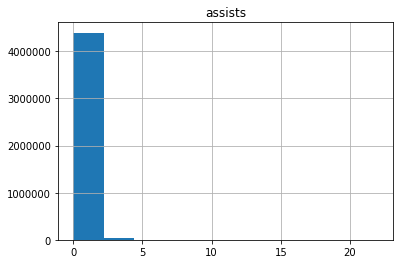

boosts does not look Gaussian, p: 0.0000000000


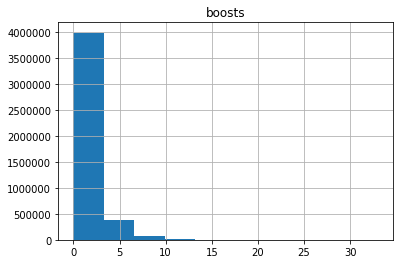

damageDealt does not look Gaussian, p: 0.0000000000


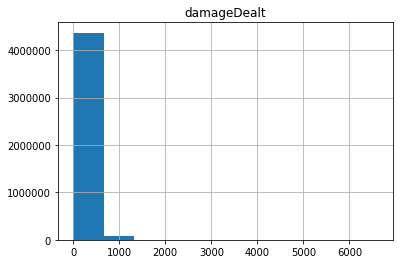

DBNOs does not look Gaussian, p: 0.0000000000


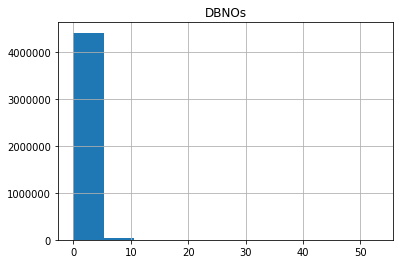

headshotKills does not look Gaussian, p: 0.0000000000


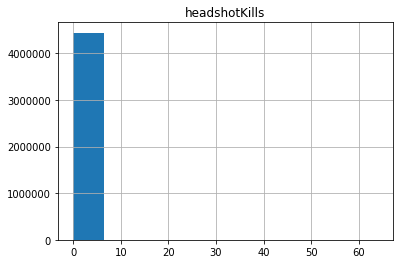

heals does not look Gaussian, p: 0.0000000000


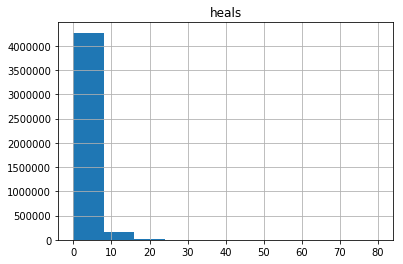

killPlace does not look Gaussian, p: 0.0000000000


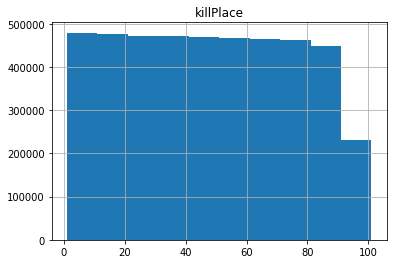

killPoints does not look Gaussian, p: 0.0000000000


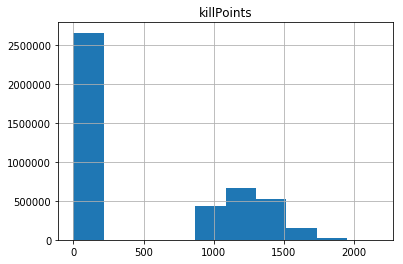

kills does not look Gaussian, p: 0.0000000000


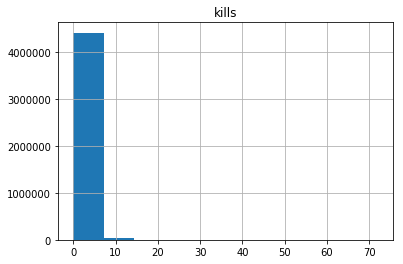

killStreaks does not look Gaussian, p: 0.0000000000


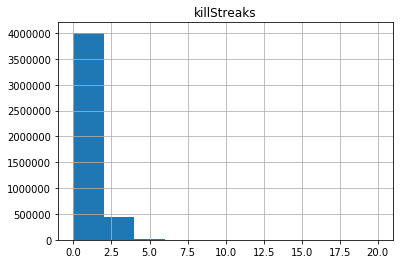

longestKill does not look Gaussian, p: 0.0000000000


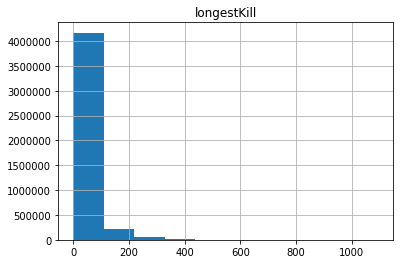

matchDuration does not look Gaussian, p: 0.0000000000


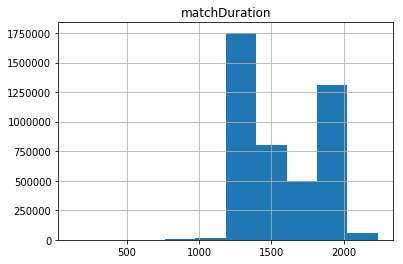

maxPlace does not look Gaussian, p: 0.0000000000


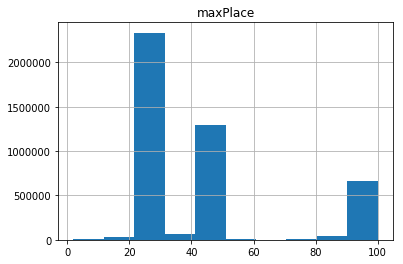

numGroups does not look Gaussian, p: 0.0000000000


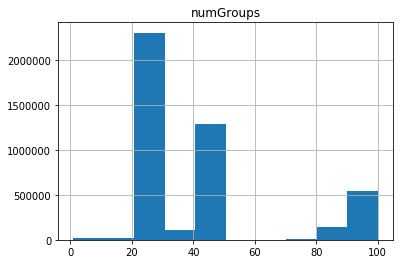

rankPoints does not look Gaussian, p: 0.0000000000


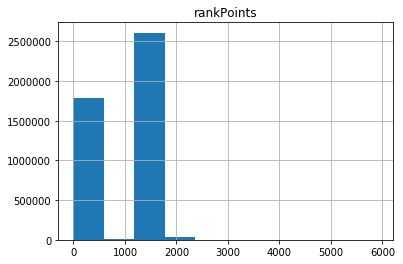

revives does not look Gaussian, p: 0.0000000000


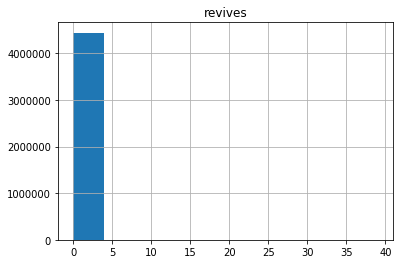

rideDistance does not look Gaussian, p: 0.0000000000


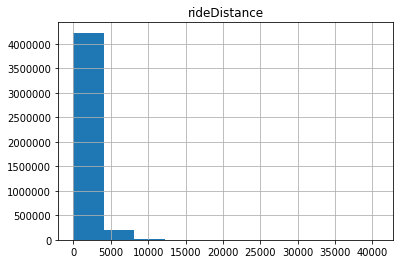

roadKills does not look Gaussian, p: 0.0000000000


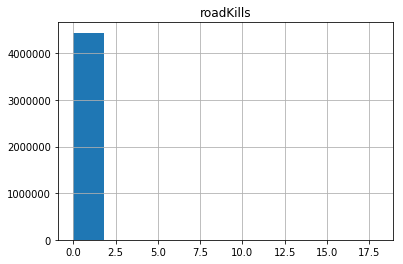

swimDistance does not look Gaussian, p: 0.0000000000


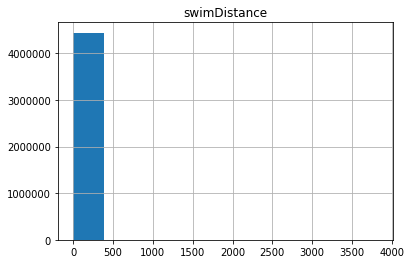

teamKills does not look Gaussian, p: 0.0000000000


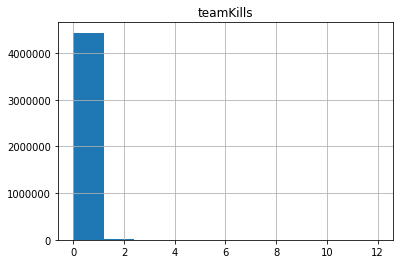

vehicleDestroys does not look Gaussian, p: 0.0000000000


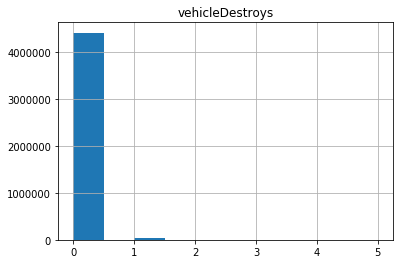

walkDistance does not look Gaussian, p: 0.0000000000


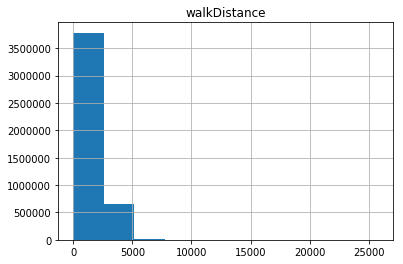

weaponsAcquired does not look Gaussian, p: 0.0000000000


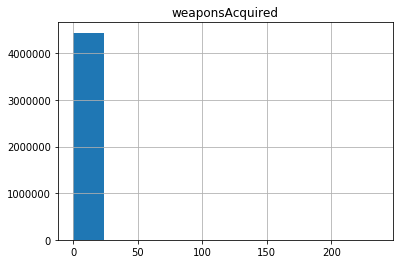

winPoints does not look Gaussian, p: 0.0000000000


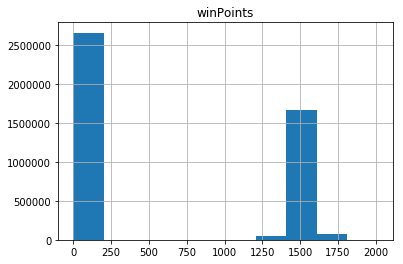

winPlacePerc does not look Gaussian, p: 0.0000000000


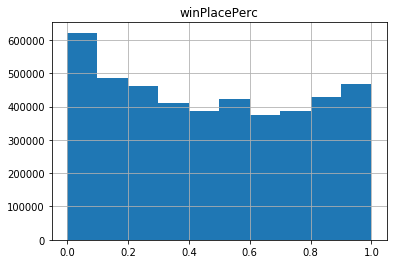

In [108]:
# brak tutaj testu statystycznego, ale po samych wartościach skośności można założyć, że dane są asymetryczne, 
# głównie prawostronnie asymetryczne. z tego względu można spróbować zlogarytmować zmienne, które są mocno skośne[2].

# dla przyspieszenia obliczeń weźmy losową próbkę
df_sample = df.sample(10000)

# sprawdźmy czy można odrzucić hipotezę o rozkładzie normalnym poszczególnych zmiennych przy poziomie ufności 0.95
numeric_df = df_sample.drop(columns=['Id', 'groupId', 'matchId', 'matchType'])
stat, p = normaltest(numeric_df)
alpha = 0.05
for i, column in enumerate(numeric_df.columns):
    
   
    if p[i] > alpha:
        print(column +" looks Gaussian, p: {0:.10f}".format(p[i]))
    else:
        print(column + " does not look Gaussian, p: {0:.10f}".format(p[i]))
    df[column].hist()
    plt.title(column)
    plt.show()

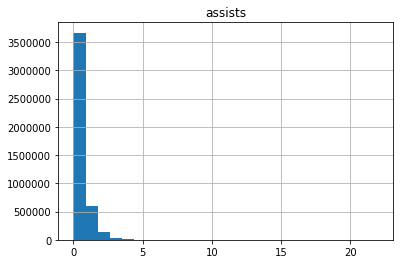

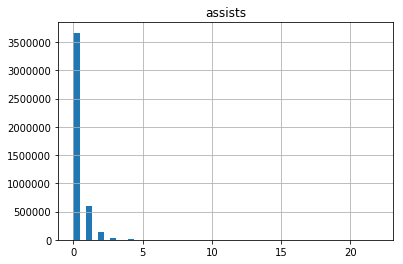

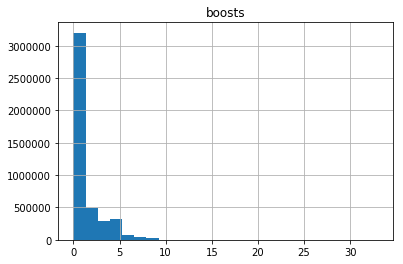

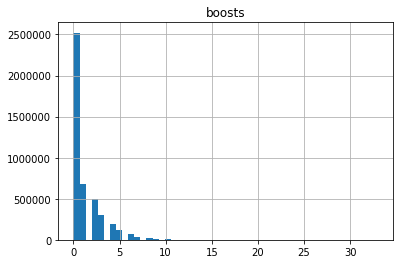

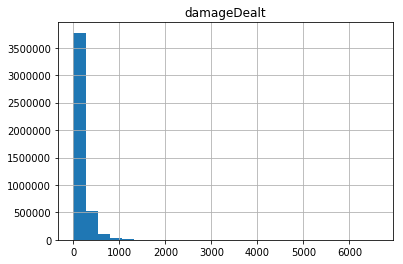

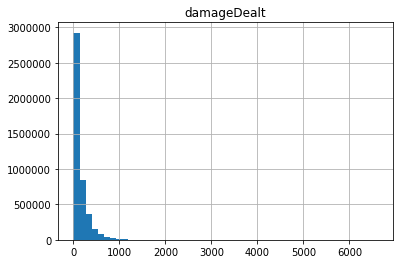

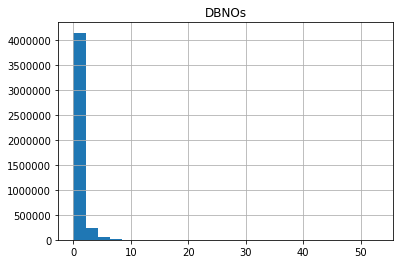

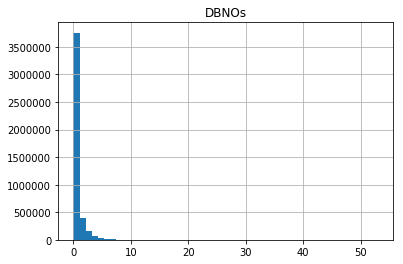

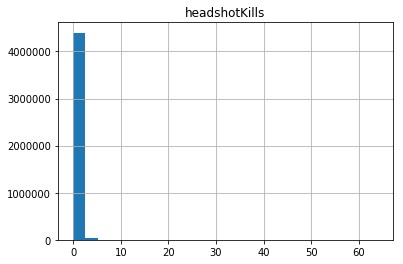

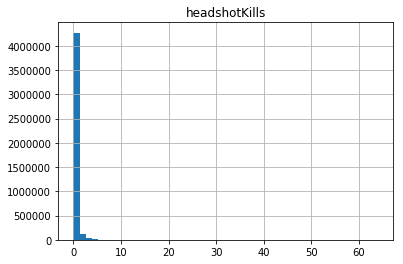

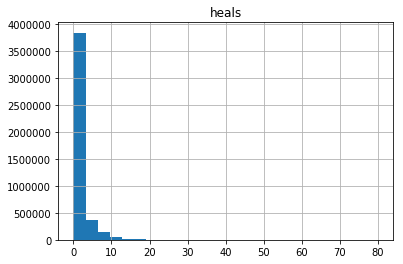

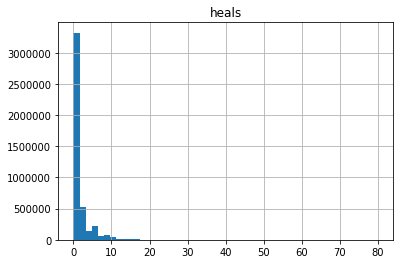

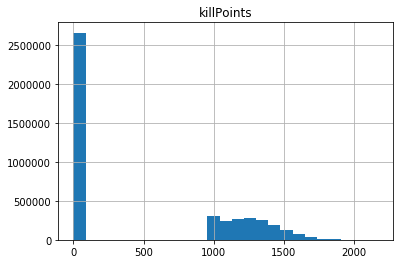

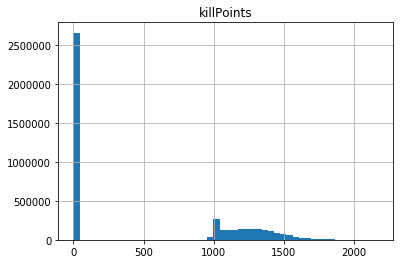

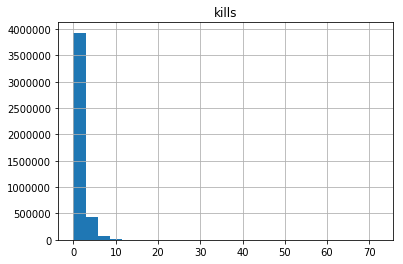

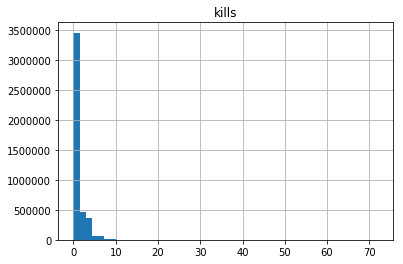

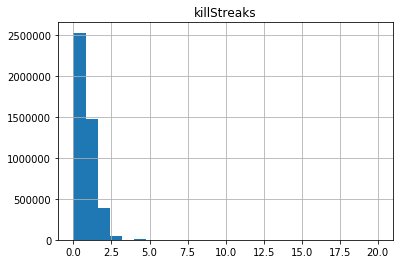

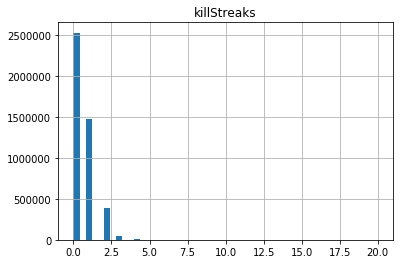

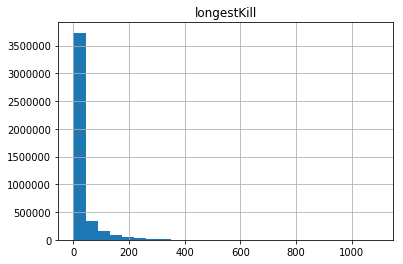

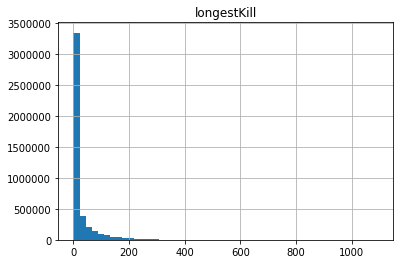

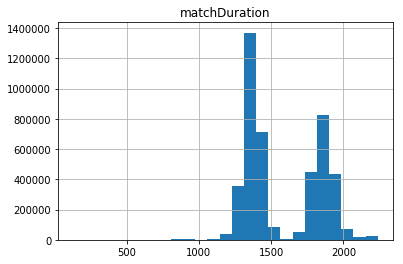

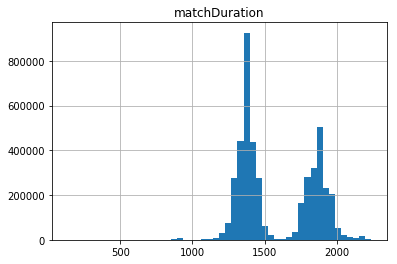

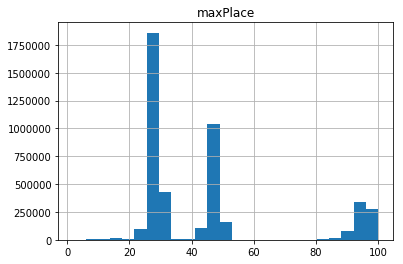

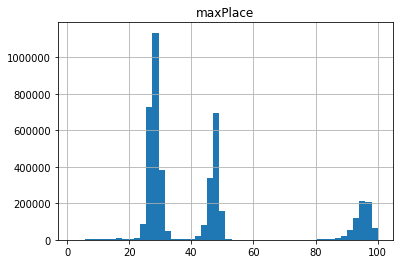

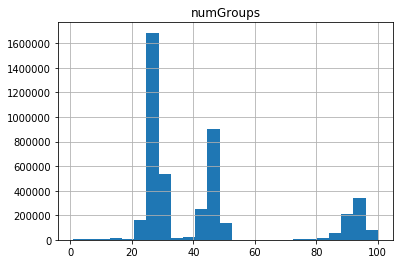

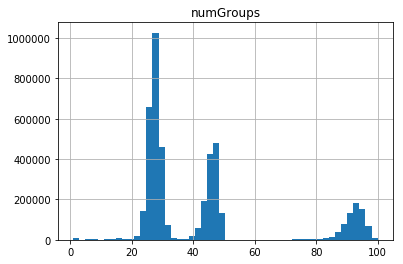

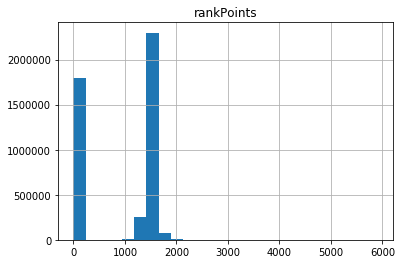

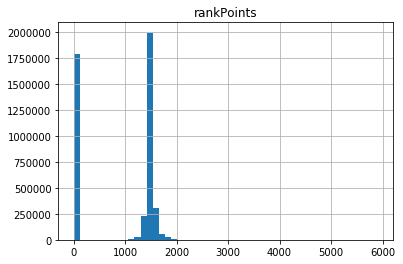

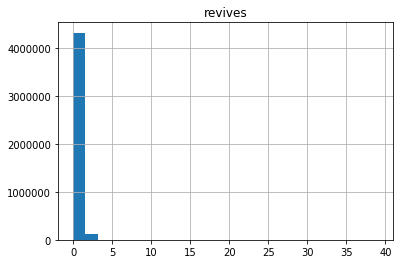

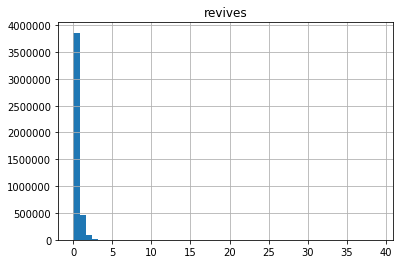

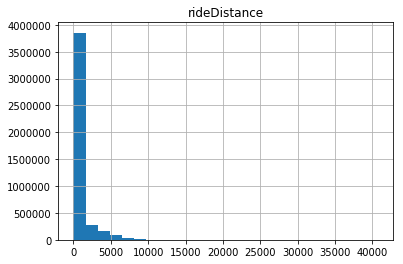

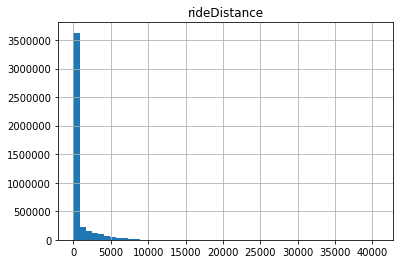

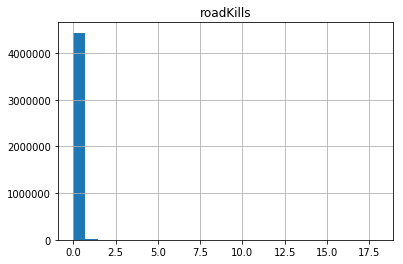

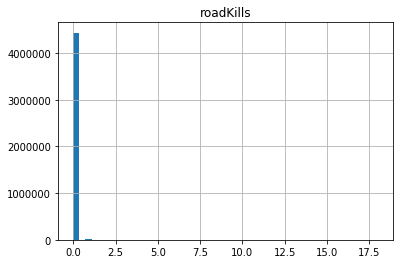

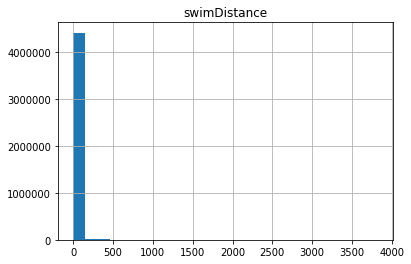

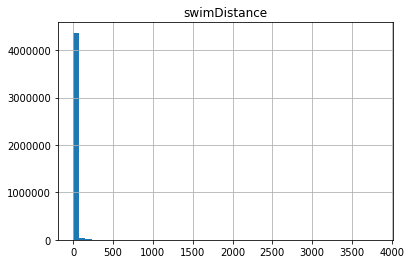

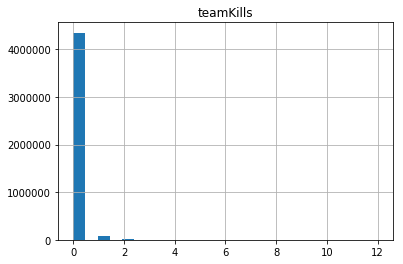

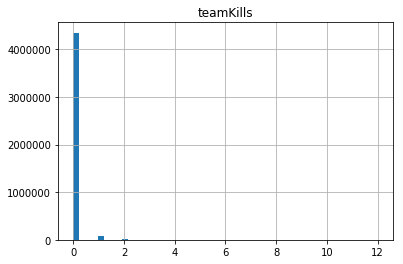

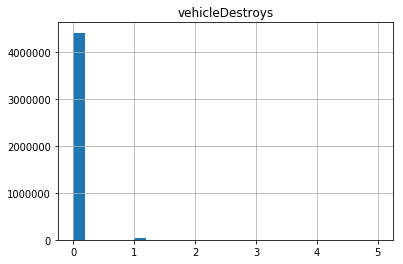

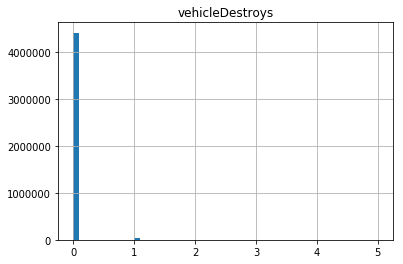

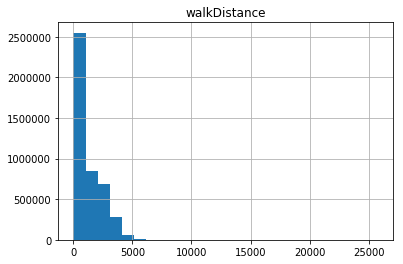

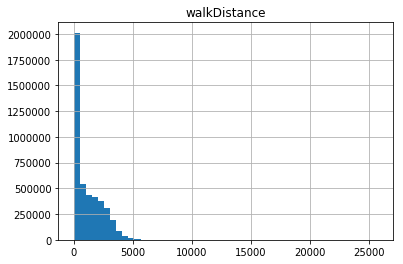

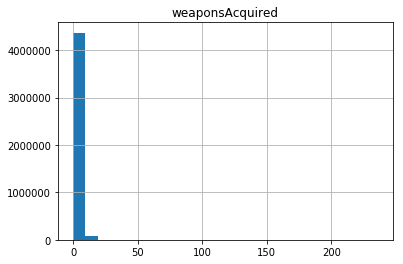

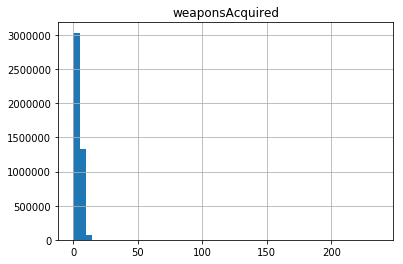

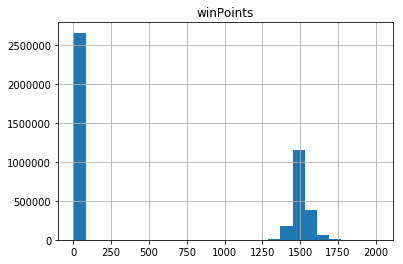

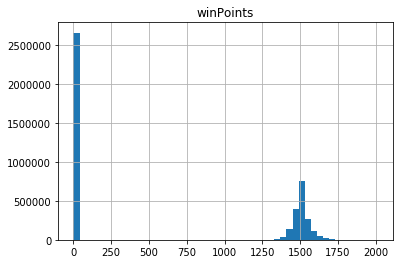

In [150]:
# jak widać żadna ze zmiennych w próbce nie przypomina rozkładu normalnego (zarówno z testu ani wizualnie - z histogramu - 
# jednak to drugie może być spowodowane małą ilością kubełków)
# jednakże rozkłady [killPlace, winPlacePerc] wizualnie przypominają rozkłady równomierne. 

# wykresy pozostałe:
# mogłyby przypominać typowe rozkłady gdyby pominąć wartości zerowe lub zwiększyć liczbę kubełków (było 10)

# tym razem użyjemy pełnego data setu
numeric_df = df.drop(columns=['Id', 'groupId', 'matchId', 'matchType', 'killPlace', 'winPlacePerc'])
for i, column in enumerate(numeric_df.columns):
    df[column].hist(bins=25)
    plt.title(column)
    plt.show()
    df[column].hist(bins=50)
    plt.title(column)
    plt.show()


In [64]:
# wykresy [matchDuration, maxPlace, numGroups] przypominają rozkłady wielomodalne:
# hipotezą autorów jest to, że liczba grup zależy od trybu gry - matchType (solo, duos, squads, ..), w której drużyny są wielkości 1,2 lub 4
# i więcej dla gier customowych.
# związany z tym będzie wielomodalny rozkład maxPlace czyli ostatnie miejsce zajęte w meczu 
# - im więcej grup tym dalsze miejsce ostatnie.
# hipotezą jest tutaj również długość trwania meczu - prawdopodobnie może zależeć od rozmiaru grup (przy czym dla rozmiaru 1/2)
# nie różni się tak bardzo dlatego tworzy rozkład dwumodalny, lekko asymetryczny w otoczeniu jednej mody

# wielkość grup prawdopodobnie wpływa także na odchylenia od rozkładu równomiernego dla [killPlace, winPlacePerc]
# na ekstremalnych wartościach tych zmiennych
# (np. 10 osobowa grupa zajmuje miejsce ostatnie = wzrost wartości 0)

# te wszystkie przemyślenia nasuwają pomysł pogrupowania statystyk meczów po matchType i/lub po każdym konkretnym meczu

# dalsze obserwacje danych: przed odrzuceniem zer należy sprawdzić ich ilość w pozostałych kolumnach
numeric_df2 = numeric_df.drop(columns=['matchDuration', 'maxPlace', 'numGroups'])
numeric_df2[numeric_df2==0].count()/numeric_df2.count()

assists           0.82
boosts            0.57
damageDealt       0.28
DBNOs             0.62
headshotKills     0.83
heals             0.60
killPoints        0.60
kills             0.57
killStreaks       0.57
longestKill       0.57
rankPoints        0.02
revives           0.87
rideDistance      0.74
roadKills         1.00
swimDistance      0.93
teamKills         0.98
vehicleDestroys   0.99
walkDistance      0.02
weaponsAcquired   0.05
winPoints         0.60
dtype: float64

In [66]:
# w analizie bez zer zostaną uwzględnione pozostałe kolumny oprócz [rankPoints, walkDistance, weaponsAcquired]
# rankPoints mimo to wydaje się posiadać wiele niskich wartości:

np.unique(numeric_df2['rankPoints'], return_counts=True)

(array([  -1,    0,  100, ..., 5820, 5827, 5910], dtype=int64),
 array([1701810,   89509,     514, ...,       1,       1,       1],
       dtype=int64))

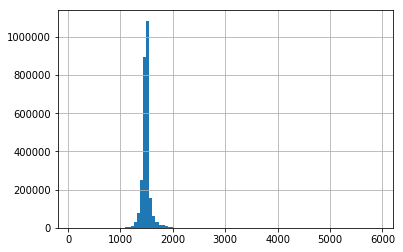

In [77]:
# Według specyfikacji kolumn rankPoints jest deprecated, oznacza ELO-like ranking  graczy, a wartości -1 zastępują 'None'.
# oprócz tego jeżeli liczba gier danego gracza jest mniejsza od 10 (wg. : https://documentation.pubg.com/en/seasons-endpoint.html)
# to wartość wynosi 0
# dodatkowo jeżeli wartość rankPoints jest różna od -1 to 0 w winPoints powinno być traktowane jako 'None'


# sprawdźmy rankPoints bez '-1' i bez '0'
rp = df['rankPoints']
rp[rp>0].hist(bins=100)

In [80]:
# rozkład przypomina normalny, o mocnej tendencji centralnej
# dla poprawnego wykorzystania tej zmiennej prawdopodobnie można wprowadzić zmienną kategoryczną wyróżniającą pomiędzy stanami
# '-1' i '0', a pozostałymi (np. w przypadku regresji liniowej) lub w ogóle z niej zrezygnować[4]

# analogiczna analiza dla kolejnej kolumny - walkDistance:
uniq, counts = np.unique(numeric_df2['walkDistance'], return_counts=True)
print(uniq, counts)
np.sort(counts)



[0.000e+00 1.000e-04 2.000e-04 ... 1.537e+04 1.625e+04 2.578e+04] [99602     4    27 ...     1     1     1]


array([    1,     1,     1, ...,   945,   955, 99602], dtype=int64)

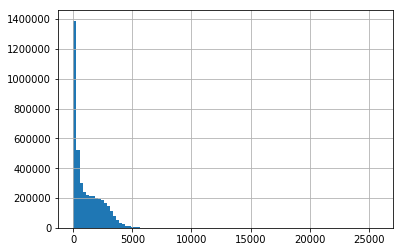

In [84]:
# walkDistance wydaje się mieć sporo zer (lub bardzo niskich wartości) dla graczy, którzy prawdopodobnie odrazu zginęli lub zostali rozłączeni z gry
# odrzućmy zera
wD = df['walkDistance']
wD[wD>0].hist(bins=100)

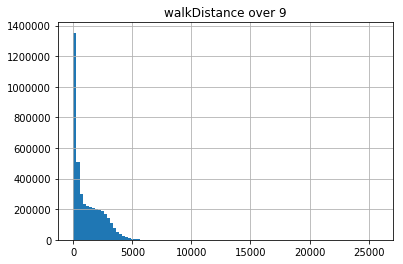

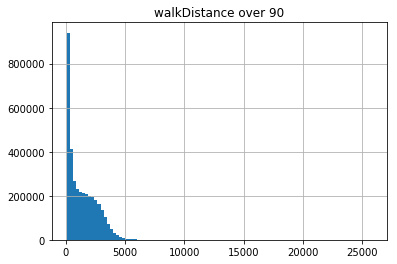

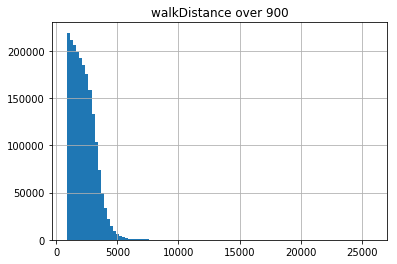

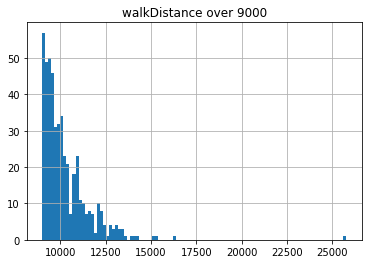

In [98]:
# spróbujmy odrzucać również niskie wartości
for i in range(4):
    val = 9*10**i
    wD[wD>val].hist(bins=100)
    plt.title("walkDistance over {0}".format(val))
    plt.show()

In [100]:
# ilość poszczególnych wartości walkDistance na początku maleje coraz wolniej, a dla wartości około kilkuset
# występuje punkt przegięcia i częstość występowania maleje szybciej ponownie

# walkDistance może zależeć od taktyki gracza - czy dużo się porusza po mapie, czy dłużej zatrzymuje się w miejscu (np. snajper)
# gra jednak wymusza poruszanie się wszystkich graczy poprzez zawężanie dostępnego miejsca na wyspie
# początkowy, szybki spadek wartości można zinterpretować początkowymi walkami między graczami, kiedy jest ich dużo na mapie
# wtedy wielu graczy ginie i kolejne wartości walkDistance są osiągane przez sporo mniejszy odsetek graczy
# późniejszej stabilizacji (wolniejszego spadku wokół punktu przegięcia na histogramie) można doszukiwać się
# po zakończeniu początkowych walk i etapie zbierania zasobów/przedmiotów po zabitych graczach
# ostateczny, ponowny szybszy spadek spowodowany jest prawdopodobnie zawężeniem mapy 
# i koniecznością rozstrzygnięcia meczu przez pozostałych graczy

# analiza ta sugeruje, że walkDistance jest bardzo mocno skorelowany dodatnio ze zmienną zależną - winPlacePerc
# i będzie jedną z ważniejszych zmiennych predykcyjnych
df['walkDistance'].corr(df['winPlacePerc'])


0.810887524499014

In [103]:
# jak widać wnioski te zostały potwierdzone.

# jako, że walkDistance może mieć wysoką wartość predykcyjną można spróbować skontruować zmienne pochodne od walkDistance
# wykorzystujące pewne przedziały w zakresie jej wartości (szczególnie ze względu na różną charakterystykę jej zmian)[5]

#analiza weaponsAcquired:
uniq, counts = np.unique(numeric_df2['weaponsAcquired'], return_counts=True)
print(uniq, counts)
np.sort(counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  80  81  83  85  87  88  89  92  94  95  96
  97 102 128 153 167 177 236] [226577 580951 768836 768347 689622 540721 369549 226776 128698  68479
  35642  18022   9388   4707   2831   1414   1088    622    640    402
    491    322    331    212    306    192    214    136    177    125
    128     84    110     77     78     64     65     41     45     29
     47     40     33     20     22     18     16     25     14     13
     13      7     16      7     10      7     10      4      5      8
     10      3      4      8      8      3      5      3      3      2
      6      1      4      3      1      1      2      1      2      2
      1      1      1      1      1  

array([     1,      1,      1,      1,      1,      1,      1,      1,
            1,      1,      1,      1,      1,      1,      1,      1,
            1,      1,      1,      2,      2,      2,      2,      2,
            2,      3,      3,      3,      3,      3,      4,      4,
            4,      5,      5,      6,      7,      7,      7,      8,
            8,      8,     10,     10,     10,     13,     13,     14,
           16,     16,     18,     20,     22,     25,     29,     33,
           40,     41,     45,     47,     64,     65,     77,     78,
           84,    110,    125,    128,    136,    177,    192,    212,
          214,    306,    322,    331,    402,    491,    622,    640,
         1088,   1414,   2831,   4707,   9388,  18022,  35642,  68479,
       128698, 226577, 226776, 369549, 540721, 580951, 689622, 768347,
       768836], dtype=int64)

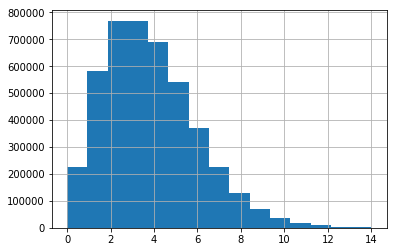

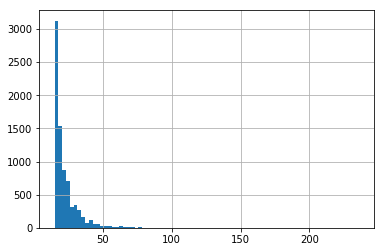

In [134]:
wa = numeric_df2['weaponsAcquired']
wa[wa<15].hist(bins=15)
plt.show()
wa[wa>=15].hist(bins = 80)
plt.show()



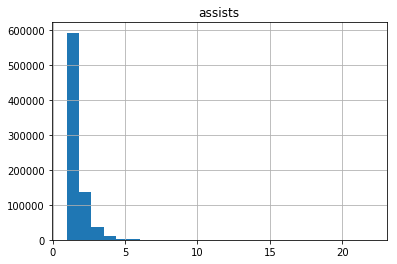

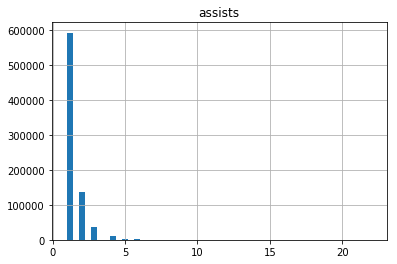

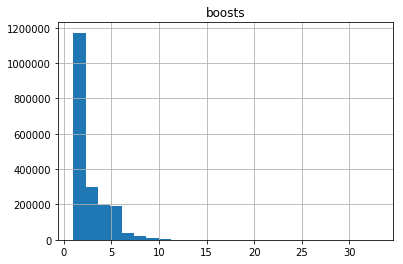

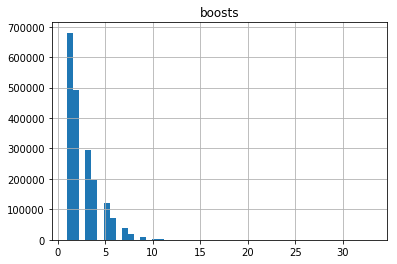

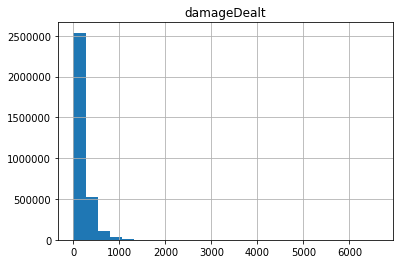

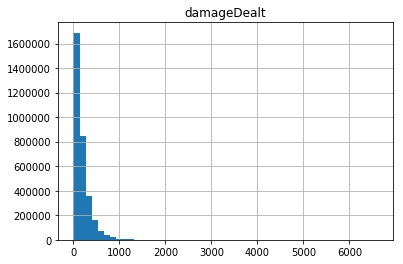

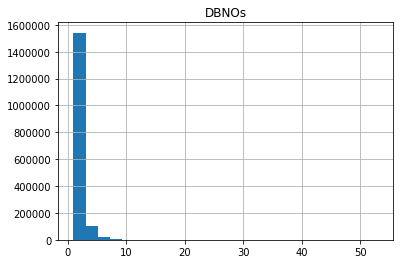

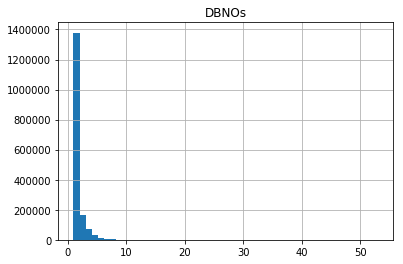

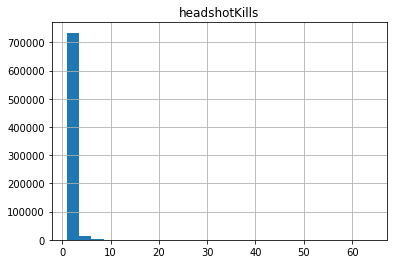

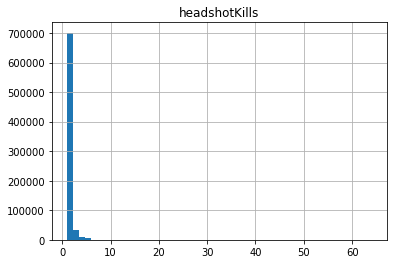

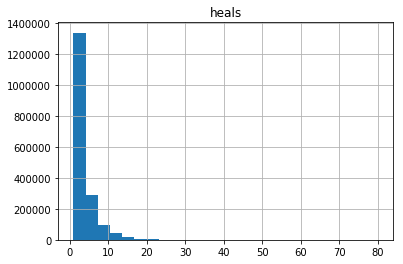

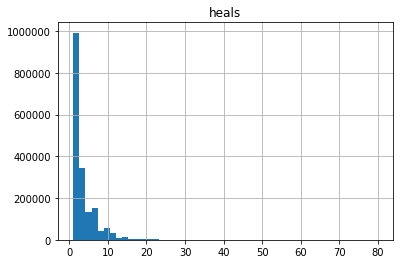

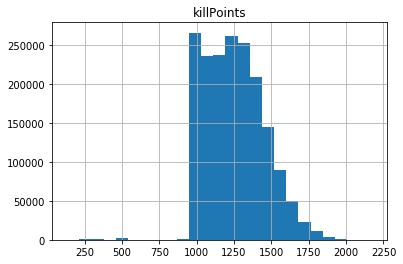

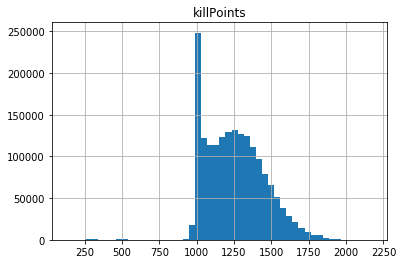

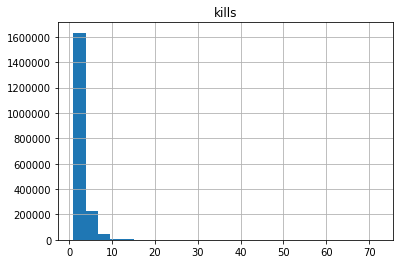

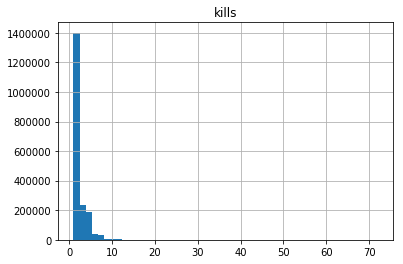

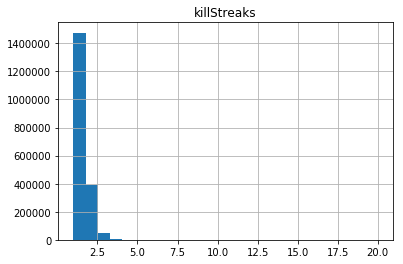

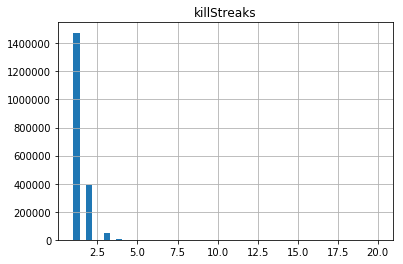

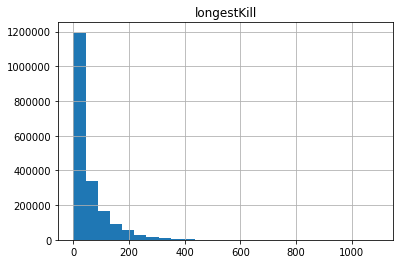

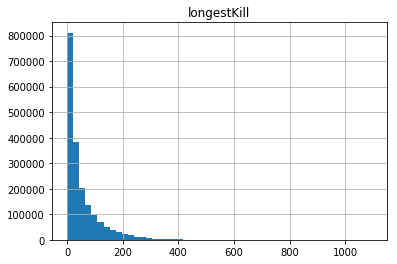

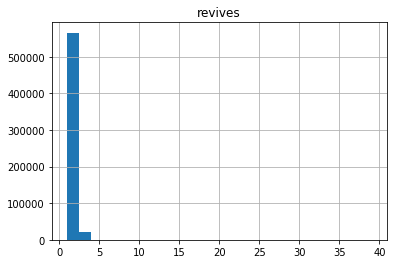

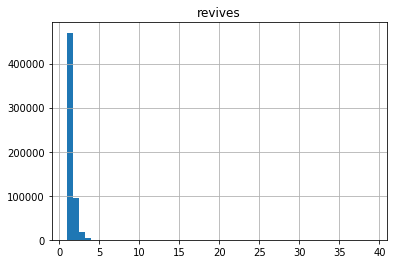

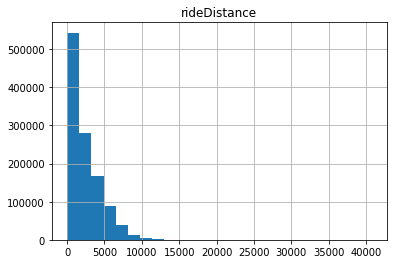

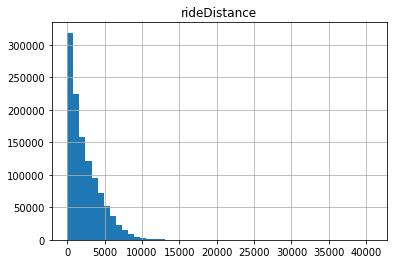

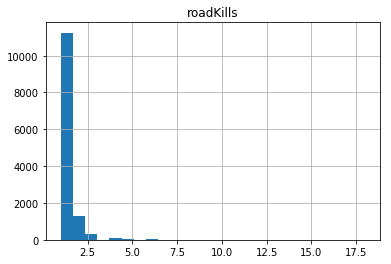

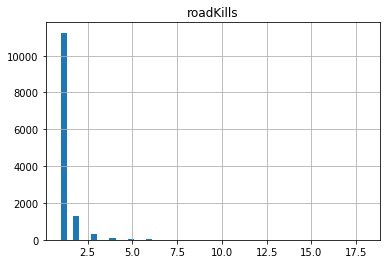

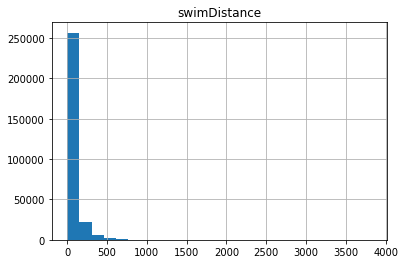

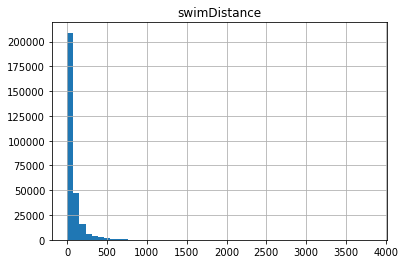

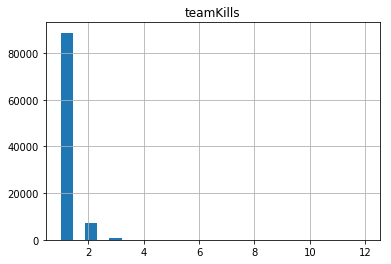

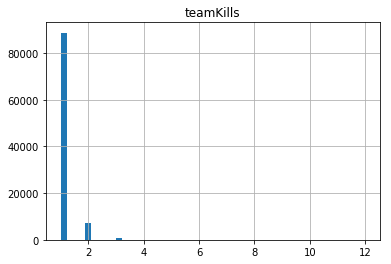

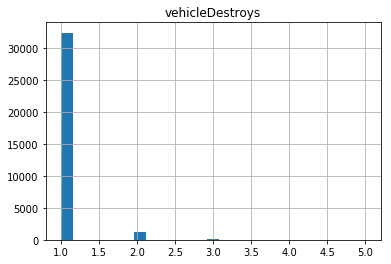

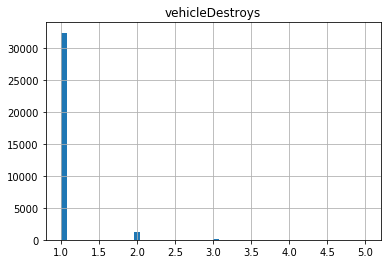

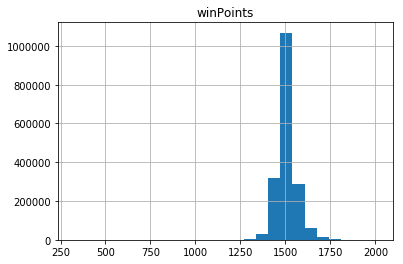

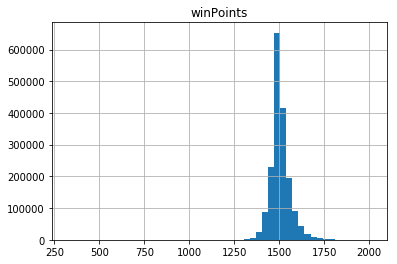

In [146]:
# rozkład ten wyglądem może przypominać rozkład Poissona, 
# ale prawdopodobnie zmienna ta nie spełnia definicji rozkładu Poissona.

# ze względu na długi ogon rozkładu i znaczenie tej kolumny (odnalezienie broni, a broni można używać tylko jednej w danej chwili)
# zasadnym wydaje się skontruowanie zmiennych informujących o znalezieniu pojedynczej/kilku/wielu broni,
# gdyż pierwsze znalezione bronie powinny mieć większy wpływ na wynik gracza niż wiele kolejnych [6]

#analiza pozostałych kolumn bez zer:
numeric_df3 = numeric_df2.drop(columns=['rankPoints', 'walkDistance', 'weaponsAcquired'])

for i, column in enumerate(numeric_df3.columns):
    
    tempSeries = numeric_df3[column]
    tempSeries = tempSeries[tempSeries >0]
    tempSeries.hist(bins=25)
    plt.title(column)
    plt.show()
    tempSeries.hist(bins=50)
    plt.title(column)
    plt.show()

In [ ]:
# Wprowadzenie zmiennych kategorycznych odpowiadających za zero w tych wartościach może potencjalnie poprawić wyniki,
# ponieważ wartości zerowe opisują dużą grupę graczy, która z jakiegoś (niewyjaśnionego w zmiennej numerycznej) względu
# osiąga wartości zerowe tych statystyk (z pominięciem statystyk grupowych dla meczy, które nie są grupowe)[7]
# Wielkość grup osiągających zerowe wartości niektórych statystyk sugeruje, że istnieje ku temu interpretowalna
# przesłanka. Np. trudno jest zniszczyć pojazd i to w praktyce rzadko się zdarza bo graczej skupiają się 
# na walce ze sobą, albo istnieją mapy bez wody i/lub z utrudnionym do niej dostępem, ponieważ gracze
# mało pływają. 

# Dodatkowo wśród kolumn można wyróżnić te odpowiadające trybom drużynowym, są to:
# [DBNOs, assists, revives, teamKills, groupId]
# oraz po części matchType

# można się zastanowić nad ich wykorzystaniem w meczach, które nie są grupowe [8]

In [56]:
# kompleksowa analiza z użyciem pandas_profiling
# jednak poprzednie analizy pozwoliły skupić się na konkretnych aspektach danych
# niż patrzeć na ogromną ilość statystyk, które są trudne do ogarnięcia na raz
# oraz wykazać zdolność do analitycznego myślenia oraz zastosowania pewnych narzędzi statystycznych przez autorów :)

eda = pp.ProfileReport(df)
display(eda)

Number of variables,30
Number of observations,4446965
Total Missing (%),0.0%
Total size in memory,1017.8 MiB
Average record size in memory,240.0 B
Numeric,24
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [ ]:
# na podstawie tej analizy odrzucimy z modeli predykcyjnych zmienne [numGroups, winPoints] [9]

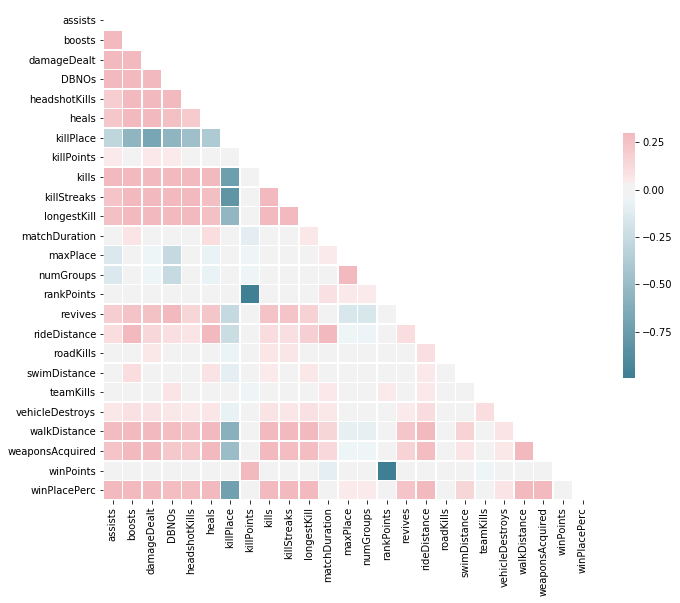

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.00,0.31,0.41,0.30,0.20,0.23,-0.29,0.04,0.32,0.24,0.26,-0.02,-0.15,-0.15,-0.02,0.20,0.11,0.01,0.02,0.01,0.06,0.29,0.24,0.02,0.30
boosts,0.31,1.00,0.52,0.36,0.33,0.54,-0.55,0.01,0.50,0.41,0.42,0.07,-0.01,-0.01,0.02,0.25,0.33,0.04,0.11,0.01,0.09,0.64,0.41,-0.01,0.63
damageDealt,0.41,0.52,1.00,0.74,0.61,0.34,-0.68,0.05,0.89,0.70,0.56,-0.01,-0.04,-0.04,-0.00,0.26,0.14,0.05,0.04,0.02,0.08,0.40,0.35,0.02,0.44
DBNOs,0.30,0.36,0.74,1.00,0.47,0.27,-0.56,0.04,0.71,0.65,0.45,-0.01,-0.27,-0.27,-0.00,0.30,0.10,0.04,0.02,0.07,0.06,0.28,0.22,0.01,0.28
headshotKills,0.20,0.33,0.61,0.47,1.00,0.20,-0.47,0.02,0.67,0.51,0.45,-0.02,0.01,0.01,0.01,0.15,0.08,0.01,0.03,0.01,0.04,0.25,0.22,0.00,0.28
heals,0.23,0.54,0.34,0.27,0.20,1.00,-0.39,-0.00,0.31,0.27,0.26,0.11,-0.06,-0.06,0.02,0.24,0.30,0.02,0.08,0.04,0.06,0.43,0.31,-0.01,0.43
killPlace,-0.29,-0.55,-0.68,-0.56,-0.47,-0.39,1.00,-0.02,-0.73,-0.81,-0.54,-0.01,0.02,0.02,-0.01,-0.27,-0.24,-0.06,-0.09,-0.04,-0.07,-0.59,-0.49,-0.00,-0.72
killPoints,0.04,0.01,0.05,0.04,0.02,-0.00,-0.02,1.00,0.04,0.04,0.01,-0.10,-0.04,-0.04,-0.98,0.01,-0.03,-0.00,-0.00,-0.04,-0.01,0.00,-0.00,0.98,0.01
kills,0.32,0.50,0.89,0.71,0.67,0.31,-0.73,0.04,1.00,0.80,0.60,-0.03,-0.00,-0.00,0.01,0.25,0.11,0.06,0.04,0.02,0.08,0.37,0.34,0.01,0.42
killStreaks,0.24,0.41,0.70,0.65,0.51,0.27,-0.81,0.04,0.80,1.00,0.52,-0.03,-0.04,-0.04,0.00,0.24,0.10,0.07,0.03,0.03,0.06,0.33,0.28,0.01,0.38


In [148]:
#(https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

# dodatkowo sprawdzamy korelacje między zmiennymi
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.pairplot(df[['kills', 'matchDuration', 'winPlacePerc']], height=1.0)
plt.show()
corr

In [198]:
# w danych zaobserwować można dość dużo umiarkowanych korelacji między zmiennymi
# zastosujemy PCA[11], aby zdekorelować dane i przy okazji zmniejszyć wymiarowość
# w tym celu należy najpierw ustandaryzować dane [10]

numeric_df = df.drop(columns=['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc'])
std = numeric_df.std()
mean = numeric_df.mean()
numeric_df = (numeric_df - mean)/std
print(len(numeric_df.columns))
numeric_df.head()



24


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,-0.40,-0.65,-0.77,-0.57,-0.38,-0.51,0.45,1.17,-0.59,-0.77,-0.45,-1.06,-0.69,-0.73,-1.21,-0.35,-0.40,-0.05,-0.15,-0.14,-0.09,-0.77,-1.08,1.16
1,-0.40,-0.65,-0.23,-0.57,-0.38,-0.51,0.34,-0.80,-0.59,-0.77,-0.45,0.76,-0.78,-0.77,0.80,-0.35,-0.40,-0.05,0.21,-0.14,-0.09,0.24,0.55,-0.82
2,1.30,-0.65,-0.37,-0.57,-0.38,-0.51,-0.02,-0.80,-0.59,-0.77,-0.45,-1.01,0.23,0.17,0.81,-0.35,-0.40,-0.05,-0.15,-0.14,-0.09,-0.84,-0.68,-0.82
3,-0.40,-0.65,-0.57,-0.57,-0.38,-0.51,1.00,-0.80,-0.59,-0.77,-0.45,-0.55,-0.57,-0.56,0.70,-0.35,-0.40,-0.05,-0.15,-0.14,-0.09,-0.80,-0.27,-0.82
4,-0.40,-0.65,-0.18,-0.57,-0.38,-0.51,-0.09,-0.80,0.05,0.64,0.70,-0.60,2.20,2.23,0.91,-0.35,-0.40,-0.05,-0.15,-0.14,-0.09,-0.93,-0.68,-0.82


In [157]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data  
pca = PCA().fit(numeric_df)

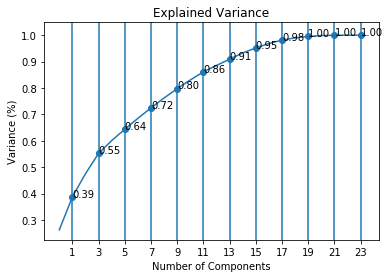

In [207]:
#(https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.scatter(list(range(1,24,2)), np.cumsum(pca.explained_variance_ratio_)[1:24:2])
for i in range(1,24,2):
    plt.annotate("{0:.2f}".format(np.cumsum(pca.explained_variance_ratio_)[i]), (i, np.cumsum(pca.explained_variance_ratio_)[i]))
    plt.axvline(x=i)

plt.xticks( list(range(1,24,2)))
plt.show()

In [208]:
# po obejrzeniu wykresu 15 wymiarów (dla nie przekształconych danych w żaden inny sposób) 
# wydaje się rozsądnym pierwszym wyborem, który zachowuje 95% wariancji
# walidacyjnie można również przetestować inne wartości np. 11-17.


pca = PCA(n_components=15)
principalComponents = pca.fit_transform(numeric_df)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.10,-2.30,-0.82,0.63,-0.11,-0.11,0.26,0.10,-0.18,-0.10,-0.32,-0.45,-0.42,-0.16,0.24
1,-1.23,1.34,-1.20,-0.37,-0.19,0.19,0.09,-0.66,-0.17,-0.46,-0.05,0.78,0.25,0.56,-0.42
2,-1.55,1.21,-0.09,0.89,-0.57,-0.32,0.07,0.96,-0.51,-0.30,1.13,-0.10,-0.09,-0.45,0.44
3,-2.09,1.13,-0.99,0.66,-0.20,0.01,0.12,0.06,-0.24,-0.24,-0.14,-0.06,-0.15,0.26,0.28
4,-1.00,1.64,3.05,1.18,0.05,-0.16,-0.01,0.31,-0.02,0.25,-0.02,0.07,-0.43,-1.00,-0.06


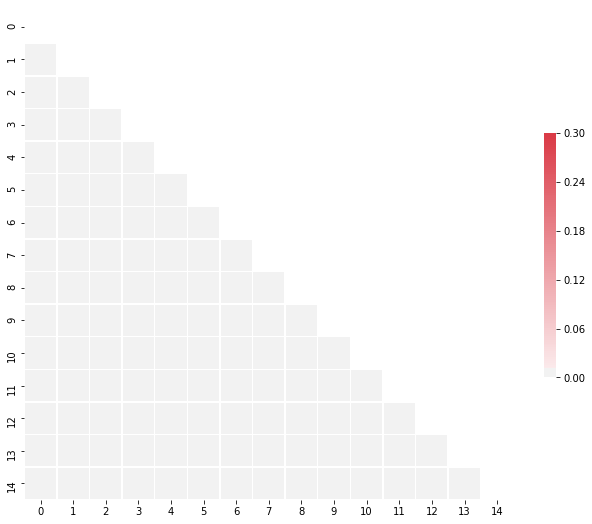

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
1,0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
2,0.00,-0.00,1.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
3,-0.00,0.00,-0.00,1.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,-0.00,-0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,-0.00,0.00,-0.00,-0.00,1.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
6,0.00,-0.00,-0.00,-0.00,0.00,-0.00,1.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
8,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
9,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,-0.00,-0.00


In [209]:
# sprawdźmy ponownie korelacje
corr = principalDf.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.pairplot(df[['kills', 'matchDuration', 'winPlacePerc']], height=1.0)
plt.show()
corr

In [214]:
# jak widać wyznaczone główne składowe są zdekorelowane.
print(principalDf.mean())
principalDf.var()

0    -0.00
1    -0.00
2     0.00
3    -0.00
4     0.00
5    -0.00
6     0.00
7     0.00
8     0.00
9    -0.00
10   -0.00
11   -0.00
12   -0.00
13   -0.00
14   -0.00
dtype: float64


0    6.30
1    3.01
2    2.11
3    1.85
4    1.16
5    1.03
6    0.99
7    0.95
8    0.90
9    0.85
10   0.79
11   0.73
12   0.59
13   0.57
14   0.57
dtype: float64

In [215]:
# Na tym autorzy zakończą analizę eksploracyjną danych mając na uwadze zaobserwowane charakterystyki danych.